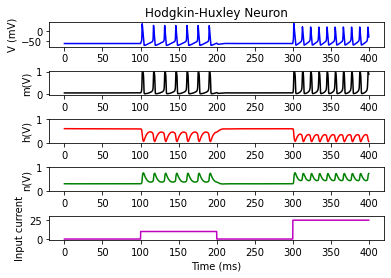

In [1]:
# Program 21a: The Hodgkin-Huxley Equations.
# See Figures 21.2 and 21.3.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
C_m = 1.0  # uF/cm^2
g_Na = 120.0  # mS/cm^2
g_K = 36.0
g_L = 0.3
V_Na = 50.0  # mV
V_K = -77.0
V_L = -54.402

# See equations (21.4)
def alpha_m(V): return 0.1 * (V + 40.0) / (1.0 - np.exp(-0.1 * (V + 40.0)))
def beta_m(V):  return 4.0 * np.exp(-0.0556 * (V + 65.0))
def alpha_h(V): return 0.07 * np.exp(-0.05 * (V + 65.0))
def beta_h(V):  return 1.0 / (1.0 + np.exp(-0.1 * (V + 35.0)))
def alpha_n(V): return 0.01 * (V + 55.0) / (1.0 - np.exp(-0.1 * (V + 55.0)))
def beta_n(V):  return 0.125 * np.exp(-0.0125 * (V + 65))

# See equation (21.2)
def I_Na(V,m,h): return g_Na * m**3 * h * (V - V_Na)
def I_K(V, n): return g_K * n**4 * (V - V_K)
def I_L(V): return g_L * (V - V_L)

# Input current
def Input_current(t): return 10 * (t > 100) - 10 * (t > 200) + 25 * (t > 300)

t = np.arange(0.0, 400.0, 0.1)

# Set up the ODEs, see equations (21.3)
def hodgkin_huxley(X, t):
    V, m, h, n = X
    dVdt = (Input_current(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
    return (dVdt, dmdt, dhdt, dndt)

y0 = [-65, 0.05, 0.6, 0.32]
X = odeint(hodgkin_huxley, y0, t)
V = X[:, 0]
m = X[:, 1]
h = X[:, 2]
n = X[:, 3]
ina = I_Na(V, m, h)
ik = I_K(V, n)
il = I_L(V)

plt.subplots_adjust(hspace = 1)
plt.figure(1)

plt.subplot(5, 1, 1)
plt.title('Hodgkin-Huxley Neuron')
plt.plot(t, V, 'b')
plt.ylabel('V (mV)')

plt.subplot(5, 1, 2)
plt.plot(t, m, 'k')
plt.ylabel('m(V)')

plt.subplot(5, 1, 3)
plt.plot(t, h, 'r')
plt.ylim(0, 1)
plt.ylabel('h(V)')

plt.subplot(5, 1, 4)
plt.plot(t, n, 'g')
plt.ylim(0, 1)
plt.ylabel('n(V)')

plt.subplot(5, 1, 5)
plt.plot(t, Input_current(t), 'm')
plt.ylabel('Input current')
plt.xlabel('Time (ms)')
plt.ylim(-1, 31)

plt.show()

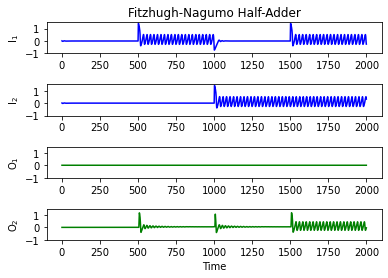

In [2]:
# Program 21b: The Fitzhugh-Nagumo Half-Adder.
# See Figure 21.6.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Input current
def input_1(t): return 1 * (t > 500) - 1 * (t>1000) + 1 * (t > 1500)
def input_2(t): return 1 * (t > 1000)

# Constants
theta = gamma = epsilon = 0.1
tmax, m, c = 2000, -100, 60

t = np.arange(0.0, 2000.0, 0.1)

def fn_odes(X, t):
    u1, v1, u2, v2, u3, v3, u4, v4 = X
    du1 = -u1 * (u1 - theta) * (u1 - 1) - v1 + input_1(t)
    dv1 = epsilon * (u1 - gamma * v1)
    du2 = -u2 * (u2 - theta) * (u2 - 1) - v2 + input_2(t)
    dv2 = epsilon * (u2 - gamma * v2)
    du3 = -u3 * ((u3 - theta) * (u3 - 1) - v3 + 0.8
          / (1 + np.exp(m*v1 + c)) + 0.8
          / (1 + np.exp(m*v2 + c)) - 1.5
          / (1 + np.exp(m*v4 + c)))
    dv3 = epsilon * (u3 - gamma*v3)
    du4 = (-u4 * (u4 - theta) * (u4 - 1) - v4 + 0.45
          / (1 + np.exp(m*v1 + c)) + 0.45
          / (1 + np.exp(m*v2 + c)))
    dv4 = epsilon * (u4 - gamma * v4)
    return (du1, dv1, du2, dv2, du3, dv3, du4, dv4)

y0 = [0.01, 0.01, 0.01, 0.01, 0, 0, 0, 0]
X = odeint(fn_odes, y0, t, rtol=1e-6)
u1, v1, u2, v2, u3, v3, u4, v4 = X.T  # unpack columns

plt.subplots_adjust(hspace=1)
plt.figure(1)

plt.subplot(4, 1, 1)
plt.title('Fitzhugh-Nagumo Half-Adder')
plt.plot(t, u1, 'b')
plt.ylim(-1, 1.5)
plt.ylabel('I$_1$')

plt.subplot(4, 1, 2)
plt.plot(t, u2, 'b')
plt.ylim(-1, 1.5)
plt.ylabel('I$_2$')

plt.subplot(4, 1, 3)
plt.plot(t, u3, 'g')
plt.ylim(0, 1)
plt.ylim(-1, 1.5)
plt.ylabel('O$_1$')

plt.subplot(4, 1, 4)
plt.plot(t, u4, 'g')
plt.ylim(-1, 1.5)
plt.ylabel('O$_2$')
plt.xlabel('Time')

plt.show()

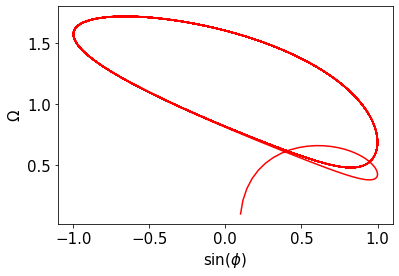

In [3]:
# Program 21c: Josephson junction limit cycle.
# See Figure 21.9.

from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

fig = plt.figure()

bj = 1.2
tmax = 100
kappa = 1.4

def jj_ode(x, t):
    return [x[1], kappa - bj*x[1] - np.sin(x[0])]

time = np.arange(0, tmax, 0.1)
x0=[0.1,0.1]
xs = odeint(jj_ode, x0, time)
imgplot = plt.plot(np.sin(xs[:, 0]), xs[:, 1], 'r-')

plt.xlabel(r'$\sin(\phi)$', fontsize=15)
plt.ylabel(r'$\Omega$', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

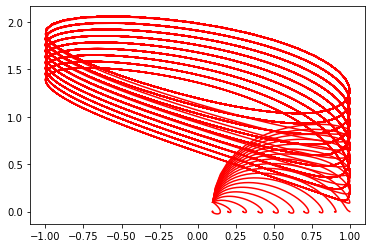

In [4]:
# Program 21d: Animation of a JJ limit cycle bifurcation.
# See Figure 21.9.

from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from scipy.integrate import odeint

fig = plt.figure()
myimages = []

bj = 1.2
tmax = 100

def jj_ode(x, t):
    return [x[1], kappa - bj*x[1] - np.sin(x[0])]

time = np.arange(0, tmax, 0.1)
x0 = [0.1, 0.1]
for kappa in np.arange(0.1, 2, 0.1):
    xs = odeint(jj_ode, x0, time)
    imgplot = plt.plot(np.sin(xs[:, 0]), xs[:, 1], 'r-')
    myimages.append(imgplot)

my_anim = ArtistAnimation(fig, myimages, interval=100, blit=False, repeat_delay=100)
plt.show()

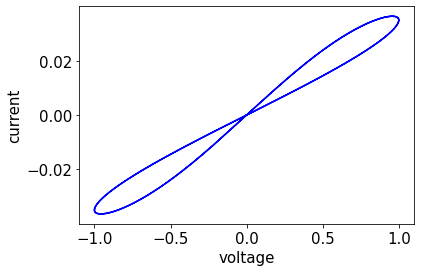

In [5]:
# Program 21e: Pinched hysteresis in a memristor.
# See Figure 21.12.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
eta, L, Roff, Ron, p, T, w0 = 1.0, 1.0, 70.0, 1.0, 10.0, 20.0, 0.5

t=np.arange(0.0, 40.0, 0.01)

# Set up the ODEs, see equations (21.3)
def memristor(X, t):
    w = X
    dwdt = ((eta * (1 - (2*w - 1) ** (2*p)) * np.sin(2*np.pi * t/T))
           / (Roff - (Roff - Ron) * w))
    return dwdt

X = odeint(memristor, [w0], t, rtol=1e-12)
w = X[:, 0]

plt.plot(np.sin(2*np.pi * t/T), np.sin(2*np.pi * t/T)
        / (Roff - (Roff - Ron) * X[:, 0]), 'b')
plt.xlabel('voltage', fontsize=15)
plt.ylabel('current', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()